In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
%matplotlib inline
sns.set()

## Import Data

In [19]:
data_dir = r'..\data\raw\\'
csv_files = glob.glob(os.path.join(data_dir, "raw*.csv"))

df = pd.DataFrame()
for f in csv_files:
    # read the csv file
    df = pd.concat([df,pd.read_csv(f)],axis=0)
    print(f)
df

..\data\raw\raw f=10.csv
..\data\raw\raw f=5.csv


,#exp,kn,gn,n_bed,d_int,d_bed,rho_int,rho_bed,freq,amp,zint_i,deg_i,E_pot,zint_f,deg_f,E_pot.1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#0,1000.0,300.0,100.0,0.02,0.006,700.0,700.0,10.0,0.006,0.1742,180.0,0.0907,0.1570,173.0,0.0922
2,#1,1000.0,300.0,100.0,0.02,0.006,720.0,700.0,10.0,0.006,0.1741,178.0,0.0907,0.5260,167.0,0.0865
3,#2,1000.0,300.0,100.0,0.02,0.006,740.0,700.0,10.0,0.006,0.1741,179.0,0.0907,0.1601,163.0,0.0915
4,#3,1000.0,300.0,100.0,0.02,0.006,760.0,700.0,10.0,0.006,0.1740,178.0,0.0907,0.4176,164.0,0.0892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,#95,1000.0,300.0,100.0,0.02,0.006,800.0,880.0,5.0,0.006,0.1743,187.0,0.0905,1.1399,201.0,0.0743
97,#96,1000.0,300.0,100.0,0.02,0.006,820.0,880.0,5.0,0.006,0.1742,187.0,0.0905,1.0417,201.0,0.0753
98,#97,1000.0,300.0,100.0,0.02,0.006,840.0,880.0,5.0,0.006,0.1742,187.0,0.0905,1.0360,200.0,0.0735
99,#98,1000.0,300.0,100.0,0.02,0.006,860.0,880.0,5.0,0.006,0.1742,187.0,0.0905,1.0012,195.0,0.0758


## Clean Data

In [21]:
df = df.dropna()
df = df.drop(df.columns[0], axis=1)
df.describe()

,gn,n_bed,d_int,d_bed,rho_int,rho_bed,freq,amp,zint_i,deg_i,E_pot,zint_f,deg_f,E_pot.1
count,200.0,200.0,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,300.0,100.0,2.000000e-02,6.000000e-03,790.000000,790.000000,7.500000,6.000000e-03,0.174133,184.680000,0.090580,0.693549,187.325000,0.081424
std,0.0,0.0,1.391261e-17,4.347692e-18,57.589781,57.589781,2.506274,4.347692e-18,0.000151,3.201382,0.000075,0.358191,14.581236,0.007139
min,300.0,100.0,2.000000e-02,6.000000e-03,700.000000,700.000000,5.000000,6.000000e-03,0.173800,176.000000,0.090500,0.145100,152.000000,0.072300
25%,300.0,100.0,2.000000e-02,6.000000e-03,740.000000,740.000000,5.000000,6.000000e-03,0.174000,182.000000,0.090500,0.336500,175.000000,0.075000
50%,300.0,100.0,2.000000e-02,6.000000e-03,790.000000,790.000000,7.500000,6.000000e-03,0.174100,186.500000,0.090600,0.790700,187.000000,0.078700
75%,300.0,100.0,2.000000e-02,6.000000e-03,840.000000,840.000000,10.000000,6.000000e-03,0.174200,187.000000,0.090600,0.998200,198.000000,0.089675
max,300.0,100.0,2.000000e-02,6.000000e-03,880.000000,880.000000,10.000000,6.000000e-03,0.174500,187.000000,0.090700,1.280300,223.000000,0.094300


## Calculate Normalized Acceleration
Normalized acceleration $\Gamma$ was defined as follow:
$$\Gamma=\frac{A(2\pi f)^2}{g}$$

Since the frequencies were varied, we can calculate $\Gamma$ for each row.

In [22]:
from math import pi 

def gamma(A,f):
    g = 9.8     
    return A*(2*pi*f)**2/g

In [23]:
df['Gamma'] = df.apply(lambda row: gamma(row['amp'],row['freq']), axis=1)
df

,gn,n_bed,d_int,d_bed,rho_int,rho_bed,freq,amp,zint_i,deg_i,E_pot,zint_f,deg_f,E_pot.1,Gamma
1,300.0,100.0,0.02,0.006,700.0,700.0,10.0,0.006,0.1742,180.0,0.0907,0.1570,173.0,0.0922,2.417046
2,300.0,100.0,0.02,0.006,720.0,700.0,10.0,0.006,0.1741,178.0,0.0907,0.5260,167.0,0.0865,2.417046
3,300.0,100.0,0.02,0.006,740.0,700.0,10.0,0.006,0.1741,179.0,0.0907,0.1601,163.0,0.0915,2.417046
4,300.0,100.0,0.02,0.006,760.0,700.0,10.0,0.006,0.1740,178.0,0.0907,0.4176,164.0,0.0892,2.417046
5,300.0,100.0,0.02,0.006,780.0,700.0,10.0,0.006,0.1740,178.0,0.0907,0.1685,171.0,0.0943,2.417046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,300.0,100.0,0.02,0.006,800.0,880.0,5.0,0.006,0.1743,187.0,0.0905,1.1399,201.0,0.0743,0.604261
97,300.0,100.0,0.02,0.006,820.0,880.0,5.0,0.006,0.1742,187.0,0.0905,1.0417,201.0,0.0753,0.604261
98,300.0,100.0,0.02,0.006,840.0,880.0,5.0,0.006,0.1742,187.0,0.0905,1.0360,200.0,0.0735,0.604261
99,300.0,100.0,0.02,0.006,860.0,880.0,5.0,0.006,0.1742,187.0,0.0905,1.0012,195.0,0.0758,0.604261


## Classifies the Intruder's Final Position

In [24]:
def int_class(z):
    if z<0.25:
        return 'Bottom'
    elif z>=0.25 and z<0.75:
        return 'Middle'
    else:
        return 'Top'

In [25]:
df['Label'] = df.apply(lambda row: int_class(row['zint_f']), axis=1)
df

,gn,n_bed,d_int,d_bed,rho_int,rho_bed,freq,amp,zint_i,deg_i,E_pot,zint_f,deg_f,E_pot.1,Gamma,Label
1,300.0,100.0,0.02,0.006,700.0,700.0,10.0,0.006,0.1742,180.0,0.0907,0.1570,173.0,0.0922,2.417046,Bottom
2,300.0,100.0,0.02,0.006,720.0,700.0,10.0,0.006,0.1741,178.0,0.0907,0.5260,167.0,0.0865,2.417046,Middle
3,300.0,100.0,0.02,0.006,740.0,700.0,10.0,0.006,0.1741,179.0,0.0907,0.1601,163.0,0.0915,2.417046,Bottom
4,300.0,100.0,0.02,0.006,760.0,700.0,10.0,0.006,0.1740,178.0,0.0907,0.4176,164.0,0.0892,2.417046,Middle
5,300.0,100.0,0.02,0.006,780.0,700.0,10.0,0.006,0.1740,178.0,0.0907,0.1685,171.0,0.0943,2.417046,Bottom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,300.0,100.0,0.02,0.006,800.0,880.0,5.0,0.006,0.1743,187.0,0.0905,1.1399,201.0,0.0743,0.604261,Top
97,300.0,100.0,0.02,0.006,820.0,880.0,5.0,0.006,0.1742,187.0,0.0905,1.0417,201.0,0.0753,0.604261,Top
98,300.0,100.0,0.02,0.006,840.0,880.0,5.0,0.006,0.1742,187.0,0.0905,1.0360,200.0,0.0735,0.604261,Top
99,300.0,100.0,0.02,0.006,860.0,880.0,5.0,0.006,0.1742,187.0,0.0905,1.0012,195.0,0.0758,0.604261,Top


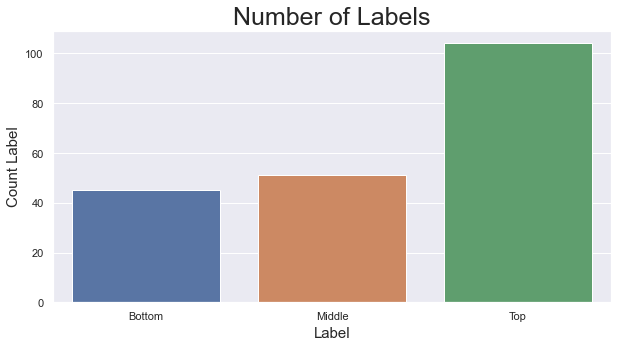

In [26]:
fig_dir = r'..\result\figure\\'
fig_title = 'Number of Labels'

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Label')
plt.title(fig_title, fontsize=25)
plt.xlabel('Label', fontsize=15)
plt.ylabel('Count Label', fontsize=15)
plt.savefig(fig_dir+fig_title+'.png', dpi=300, bbox_inches='tight', facecolor='w')
plt.show()
plt.close()

<AxesSubplot:xlabel='count', ylabel='rho_int'>

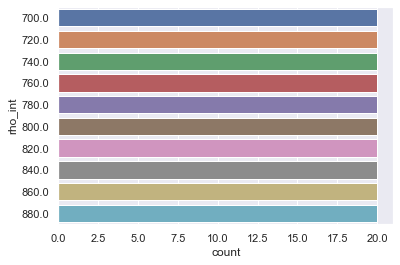

In [29]:
sns.countplot(y=df['rho_int'])